# 1.Import library

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Creat the path
path = r'/Users/nhungphamthi/Documents/data analytis/Achievement 4 Project'

In [14]:
# Import most up-to-date project data. After reading the taskes, I drop some columns to reduce the size of data.
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_drop.pkl'))

# 3. Provide the Instacart senior stakeholders with descriptive findings about sales.

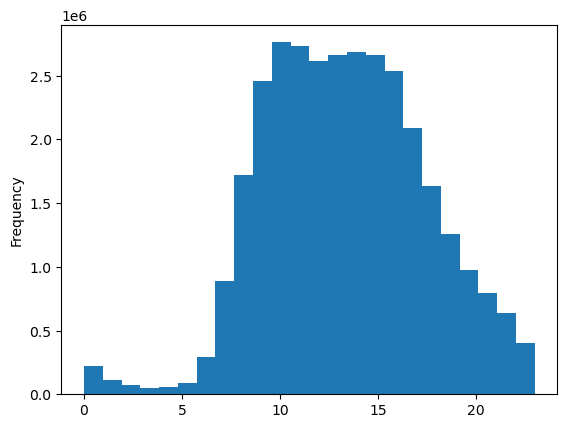

In [16]:
#Create a histogram of the “order_hour_of_day” column
hist = instacart['order_hour_of_day'].plot.hist(bins = 24)

#### The histogram exhibits peaks during certain hours, which indicate the times of day when the most orders are placed. The peak occurs around 10h-16h. The shape of the distribution could tell us if the ordering pattern is concentrated within a specific time of the day or if it is relatively uniform. A normal distribution might suggest a consistent shopping pattern centered around a particular time, while a skewed distribution could indicate a tendency to shop during specific times, like afternoons or evenings.

# 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. 

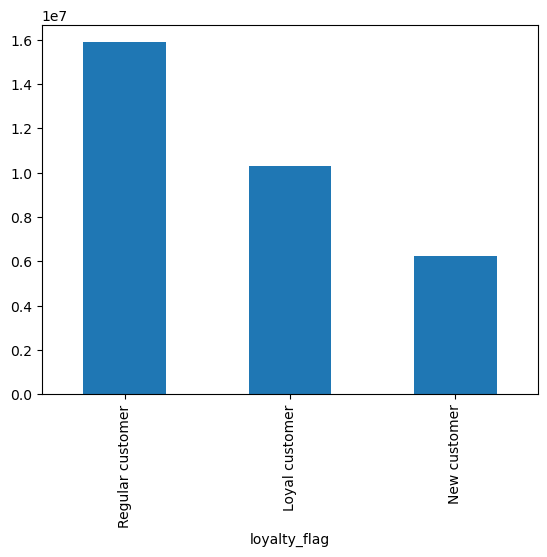

In [18]:
#Create a bar chart from the “loyalty_flag” column
bar = instacart['loyalty_flag'].value_counts().plot.bar()

# 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [74]:
# Create a random sample by generating a seed
np.random.seed(4)

In [76]:
# Create a dev list based on the data split we want (70/30)
dev = np.random.rand(len(instacart)) <= 0.7

In [78]:
# Split the dataframe into two samples
big = instacart[dev]
small = instacart[~dev]

In [80]:
# Compare the dataframe length to the sum of the big and small samples
len(instacart)

32404859

In [82]:
len(big) + len(small)

32404859

In [84]:
# Reduce the samples to only the columns needed
instacart_2 = small [['order_hour_of_day','prices']]

In [86]:
# Check if the subset of the sample was made properly
instacart_2.head

<bound method NDFrame.head of           order_hour_of_day  prices
0                         8     9.0
2                         8     4.4
3                         8     4.7
6                         7     3.0
10                        7     4.0
...                     ...     ...
32404841                 12     3.8
32404842                 12     5.9
32404843                 12     3.7
32404849                 12     3.2
32404850                 12    12.3

[9721098 rows x 2 columns]>

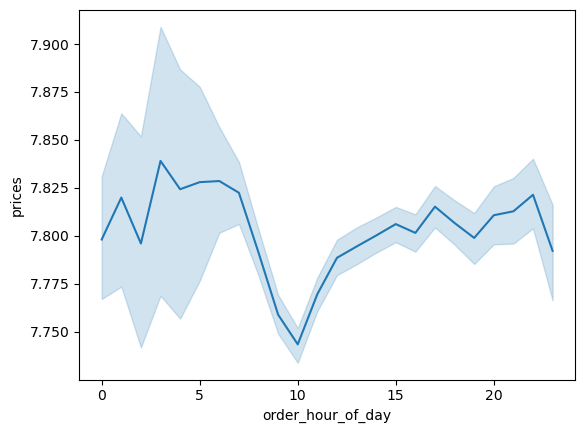

In [89]:
# Create a line chart
line = sns.lineplot(data = instacart_2, x = 'order_hour_of_day',y = 'prices')

# 6. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [36]:
# Reduce previously made sample to only the columns needed
instacart_3 = small [['age','number_dependant']]

In [38]:
# Check if the subset of the sample was made properly
instacart_3.head()

,age,number_dependant
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


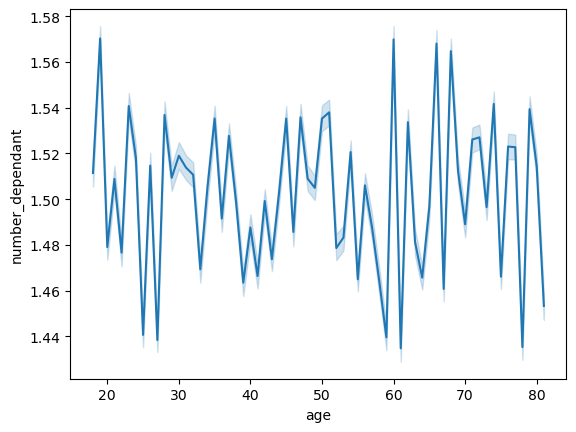

In [40]:
# Create a line chart
line_2 = sns.lineplot(data = instacart_3, x = 'age',y = 'number_dependant')

#### There are no clear patterns that would indicate a strong relationship between age and the number of dependents; for example, the line does not consistently go up or down as age increases.

# 7. Explore whether there’s a connection between age and spending power (income) using a scatterplot

In [123]:
#creating a sample of the dataframe
sampled_instacart = instacart.sample(n=100000, random_state=1)

In [101]:
# I dont understand why the column "income" in this file contain "minus value" like in table below. I checked in this column in the ex 4.9.1 before merging, it has not "minus value"
sampled_instacart.describe()

,order_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,prices,avg_product_price,median_days_between_orders,age,number_dependant,income,number_independant
count,100000.000000,100000.000000,100000.000000,100000.000000,93586.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,-0.248340,17.121500,2.731280,13.413720,11.107986,7.774009,7.786295,10.371805,49.529470,1.505330,-1.302140,1.505330
std,73.838438,17.507025,2.088572,4.245687,8.789845,4.241189,0.736737,7.126037,18.477948,1.117705,74.122133,1.117705
min,-128.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.775000,0.000000,18.000000,0.000000,-128.000000,0.000000
25%,-64.000000,5.000000,1.000000,10.000000,5.000000,4.200000,7.372991,6.000000,34.000000,1.000000,-66.000000,1.000000
50%,0.000000,11.000000,3.000000,13.000000,8.000000,7.300000,7.808760,8.000000,49.000000,2.000000,-2.000000,2.000000
75%,63.000000,24.000000,5.000000,16.000000,15.000000,11.300000,8.226220,13.000000,65.000000,3.000000,63.000000,3.000000
max,127.000000,99.000000,6.000000,23.000000,30.000000,25.000000,13.971428,30.000000,81.000000,3.000000,127.000000,3.000000


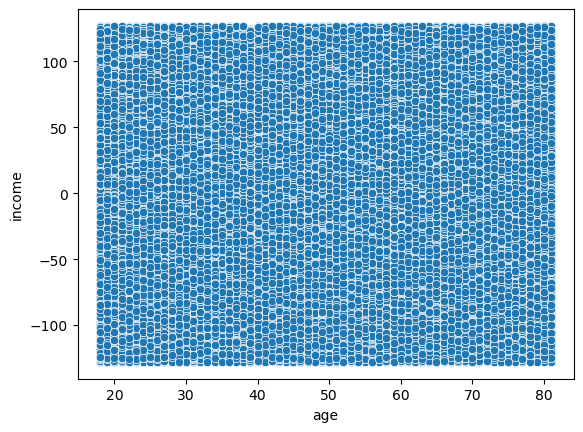

In [125]:
#creating a scatterplot of 'Age' and 'Income'
scatter_instacart= sns.scatterplot(x='age', y='income', data=sampled_instacart)

# 8. Export 

In [104]:
#exporting and saving images
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [106]:
#exporting and saving image
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [110]:
#exporting and saving image
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age and dependent.png'))

In [112]:
#exporting and saving image
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_hour_of_day and prices.png'))

In [115]:
#exporting and saving image
scatter_instacart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter income and age.png'))